In [2]:
import pandas as pd
import statsmodels.tsa.api as sm
import matplotlib.pyplot as plt

In [3]:
#参数设定区域
date_begin = '2002-07-08'
date_end = '2013-06-06'
column_1 = 'EUR'
column_2 = 'GBP'
column_3 = 'JPY'
lag = 10  # The Maximum Lag(P) of AIC and BIC
t = 10    # IRF 和 FEVD 的期數

In [4]:
#讀取Excel資料,建構日期數列,調整已讀取之數據
#合成以日期為Index的DataFrame  ==> data
df=pd.read_excel('D:/data/currencynew.xls')
Date=pd.date_range(date_begin,date_end)
df = df.drop(0)
df = df.drop('Date',axis = 1)
df = df.drop(column_1,axis = 1)
df = df.drop(column_2,axis = 1)
df = df.drop(column_3,axis = 1)
df = df.values
data=pd.DataFrame(df,index = Date,columns=[column_1,column_2,column_3])

In [5]:
# 定义函数輸出Dickey-Fuller Test 單根檢定 結果
def print_adfuller(string):
    result = sm.stattools.adfuller(data[string])
    print (string)
    print ('adf(Test statistic)', result[0])
    print ('p-value            ', result[1])
    print ('Num of lags used   ', result[2])
    print ('Num of Obs         ', result[3])
    print ('Critical Value     ', result[4])
    print ('*'*105)

# 进行Dickey-Fuller Test 單根檢定 
print ('Dickey-Fuller Test 單根檢定')
print_adfuller(column_1)
print_adfuller(column_2)
print_adfuller(column_3)

Dickey-Fuller Test 單根檢定
EUR
adf(Test statistic) -54.1287522023
p-value             0.0
Num of lags used    0
Num of Obs          3986
Critical Value      {'10%': -2.5671561276258172, '1%': -3.4319916247463209, '5%': -2.8622653800145192}
*********************************************************************************************************
GBP
adf(Test statistic) -41.4816327514
p-value             0.0
Num of lags used    1
Num of Obs          3985
Critical Value      {'10%': -2.567156224565458, '1%': -3.4319920369631411, '5%': -2.8622655621093331}
*********************************************************************************************************
JPY
adf(Test statistic) -32.1166049569
p-value             0.0
Num of lags used    3
Num of Obs          3983
Critical Value      {'10%': -2.5671564185908364, '1%': -3.4319928620181468, '5%': -2.8622659265733703}
*********************************************************************************************************


In [16]:
#不使用函數的形式
result = sm.stattools.adfuller(data[column_1])
print (column_1)
print ('adf(Test statistic)', result[0])
print ('p-value            ', result[1])
print ('Num of lags used   ', result[2])
print ('Num of Obs         ', result[3])
print ('Critical Value     ', result[4])
print ('*'*50)

result = sm.stattools.adfuller(data[column_2])
print (column_2)
print ('adf(Test statistic)', result[0])
print ('p-value            ', result[1])
print ('Num of lags used   ', result[2])
print ('Num of Obs         ', result[3])
print ('Critical Value     ', result[4])
print ('*'*50)

result = sm.stattools.adfuller(data[column_2])
print (column_2)
print ('adf(Test statistic)', result[0])
print ('p-value            ', result[1])
print ('Num of lags used   ', result[2])
print ('Num of Obs         ', result[3])
print ('Critical Value     ', result[4])
print ('*'*50)

EUR
adf(Test statistic) -54.1287522023
p-value             0.0
Num of lags used    0
Num of Obs          3986
Critical Value      {'10%': -2.5671561276258172, '1%': -3.4319916247463209, '5%': -2.8622653800145192}
**************************************************
GBP
adf(Test statistic) -41.4816327514
p-value             0.0
Num of lags used    1
Num of Obs          3985
Critical Value      {'10%': -2.567156224565458, '1%': -3.4319920369631411, '5%': -2.8622655621093331}
**************************************************
GBP
adf(Test statistic) -41.4816327514
p-value             0.0
Num of lags used    1
Num of Obs          3985
Critical Value      {'10%': -2.567156224565458, '1%': -3.4319920369631411, '5%': -2.8622655621093331}
**************************************************


In [14]:
#尋找最小的AIC和BIC，即最合適的P
model = sm.VAR(data)
P=model.select_order(lag)
print ('*'*60)

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -5.332       -5.327     0.004836       -5.330
1        -5.460      -5.441*     0.004254       -5.453
2       -5.468*       -5.435    0.004219*      -5.456*
3        -5.466       -5.418     0.004230       -5.449
4        -5.465       -5.403     0.004232       -5.443
5        -5.465       -5.389     0.004234       -5.438
6        -5.463       -5.373     0.004241       -5.431
7        -5.463       -5.359     0.004241       -5.426
8        -5.462       -5.344     0.004245       -5.420
9        -5.460       -5.327     0.004254       -5.413
10       -5.457       -5.310     0.004264       -5.405
* Minimum

************************************************************


In [8]:
#輸出基於AIC之最適P的VAR結果
result = model.fit(P['aic'])
print ()
print ('The Result of Vector AutoRegression ( p =',P['aic'],')')
print (result.summary())


The Result of Vector AutoRegression ( p = 2 )
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 23, Dec, 2016
Time:                     21:58:10
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -5.43680
Nobs:                     3985.00    HQIC:                  -5.45819
Log likelihood:          -6043.54    FPE:                 0.00421145
AIC:                     -5.46995    Det(Omega_mle):      0.00418934
--------------------------------------------------------------------
Results for equation EUR
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         -0.005836         0.007453           -0.783           0.434
L1.EUR         0.200155         0.022708            8.814           0.000
L1.GBP        -0.061566         0.024107   

In [13]:
#Granger causality test
result.test_causality(column_1,column_2,kind='wald')
print ()
result.test_causality(column_1,column_3,kind='wald')
print ()
result.test_causality(column_1,[column_2,column_3],kind='wald')
print ()

result.test_causality(column_2,column_1,kind='wald')
print ()
result.test_causality(column_2,column_3,kind='wald')
print ()
result.test_causality(column_2,[column_1,column_3],kind='wald')
print ()

result.test_causality(column_3,column_1,kind='wald')
print ()
result.test_causality(column_3,column_2,kind='wald')
print ()
result.test_causality(column_3,[column_1,column_2],kind='wald')
print ()

Granger causality wald-test
   Test statistic   Critical Value          p-value  df
-------------------------------------------------------
         6.641234         5.991465            0.036   2
H_0: ['GBP'] do not Granger-cause EUR
Conclusion: reject H_0 at 5.00% significance level

Granger causality wald-test
   Test statistic   Critical Value          p-value  df
-------------------------------------------------------
         1.464203         5.991465            0.481   2
H_0: ['JPY'] do not Granger-cause EUR
Conclusion: fail to reject H_0 at 5.00% significance level

Granger causality wald-test
   Test statistic   Critical Value          p-value  df
-------------------------------------------------------
         7.911412         9.487729            0.095   4
H_0: ['GBP', 'JPY'] do not Granger-cause EUR
Conclusion: fail to reject H_0 at 5.00% significance level

Granger causality wald-test
   Test statistic   Critical Value          p-value  df
-----------------------------------

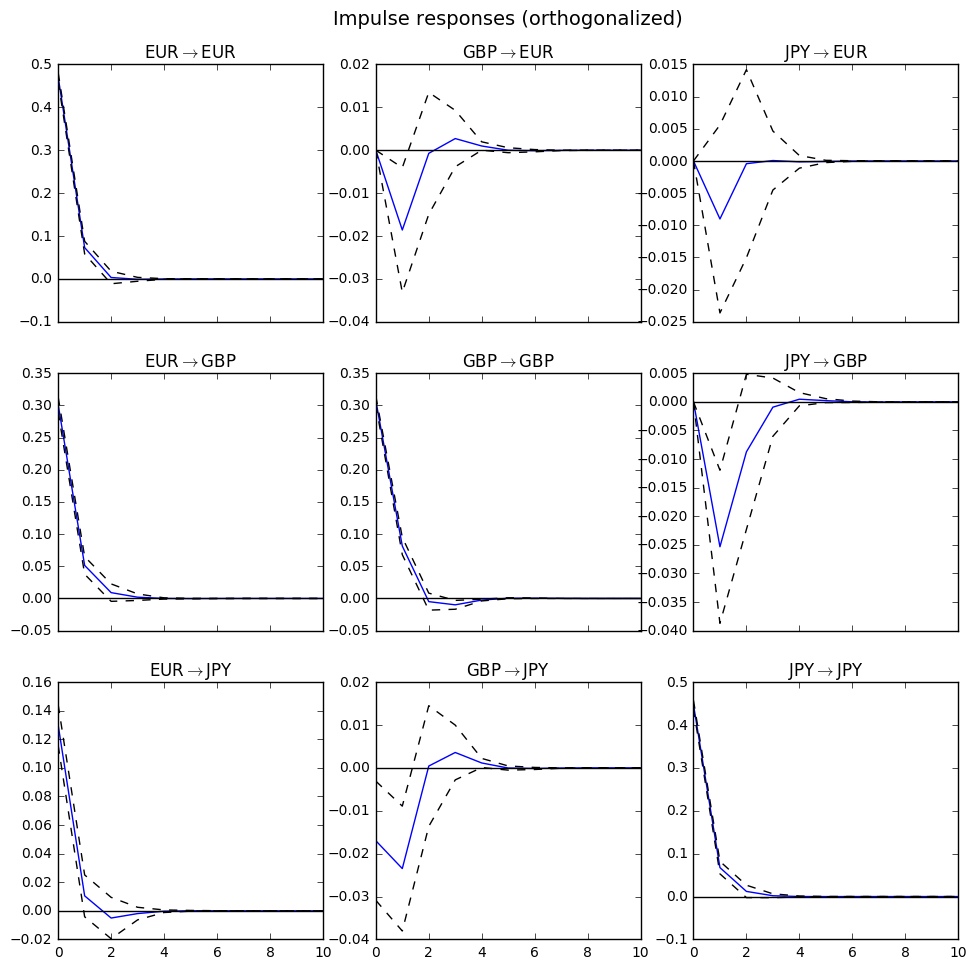

In [11]:
#IRF - Impulse Response analysis
irf = result.irf(t)
irf.plot(orth = True)
plt.show()

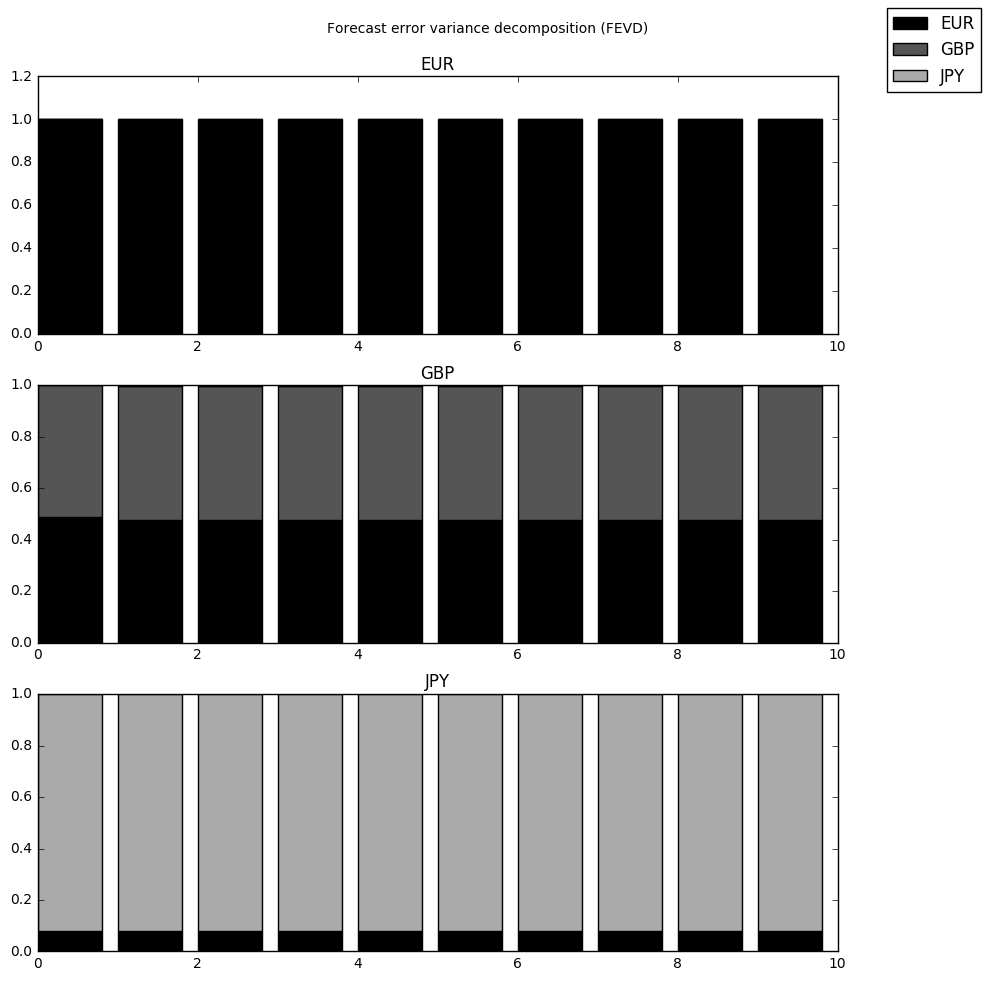

FEVD for EUR
          EUR       GBP       JPY
0    1.000000  0.000000  0.000000
1    0.998118  0.001524  0.000358
2    0.998115  0.001526  0.000359
3    0.998082  0.001559  0.000359
4    0.998078  0.001563  0.000359
5    0.998078  0.001563  0.000359
6    0.998078  0.001563  0.000359
7    0.998078  0.001563  0.000359
8    0.998078  0.001563  0.000359
9    0.998078  0.001563  0.000359

FEVD for GBP
          EUR       GBP       JPY
0    0.489516  0.510484  0.000000
1    0.478169  0.518544  0.003287
2    0.478141  0.518184  0.003675
3    0.477909  0.518414  0.003678
4    0.477893  0.518428  0.003679
5    0.477893  0.518428  0.003679
6    0.477893  0.518429  0.003679
7    0.477893  0.518429  0.003679
8    0.477893  0.518429  0.003679
9    0.477893  0.518429  0.003679

FEVD for JPY
          EUR       GBP       JPY
0    0.077630  0.001328  0.921042
1    0.076305  0.003773  0.919922
2    0.076360  0.003771  0.919868
3    0.076370  0.003829  0.919802
4    0.076370  0.003834  0.919796
5    0.

In [12]:
#FEVD - Forecast Error Variance Decompositions
fevd = result.fevd(t)
fevd.plot()
plt.show()
print (fevd.summary())